In [8]:
from dataClass import FlowData
import matplotlib.pyplot as plt
import numpy as np

In [4]:
test_1_d = ["mu=0.0_T=0.3_sigmaMax=6.0_Lambda=1000.0_kir=0.0001_nGrid=1000_nFlavor=2_tolerance=1.000000e-12_d=1.hdf5",
            "mu=0.0_T=0.3_sigmaMax=12.0_Lambda=1000.0_kir=0.0001_nGrid=2000_nFlavor=2_tolerance=1.000000e-12_d=1.hdf5",
            "mu=0.0_T=0.3_sigmaMax=24.0_Lambda=1000.0_kir=0.0001_nGrid=4000_nFlavor=2_tolerance=1.000000e-12_d=1.hdf5"]

test_2_d = ["mu=0.0_T=0.3_sigmaMax=6.0_Lambda=1000.0_kir=0.0001_nGrid=1000_nFlavor=2_tolerance=1.000000e-12_d=2.hdf5",
            "mu=0.0_T=0.3_sigmaMax=12.0_Lambda=1000.0_kir=0.0001_nGrid=2000_nFlavor=2_tolerance=1.000000e-12_d=2.hdf5",
            "mu=0.0_T=0.3_sigmaMax=24.0_Lambda=1000.0_kir=0.0001_nGrid=4000_nFlavor=2_tolerance=1.000000e-12_d=2.hdf5"]

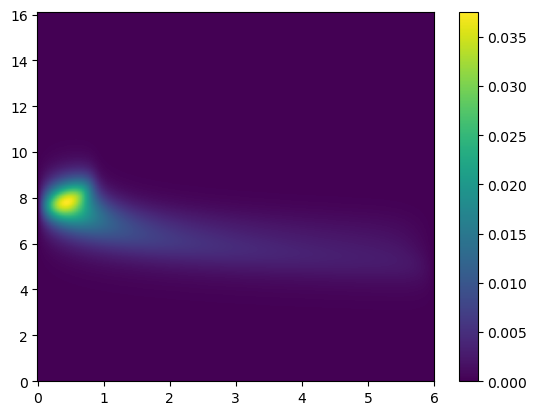

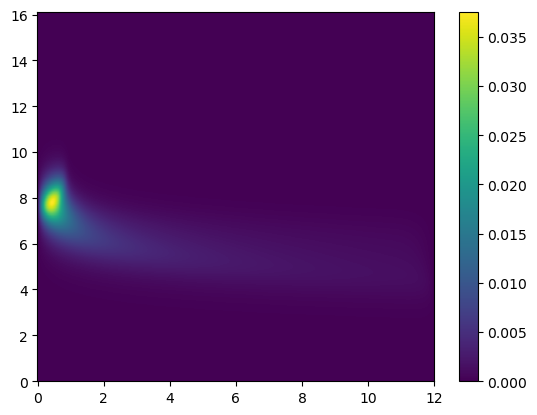

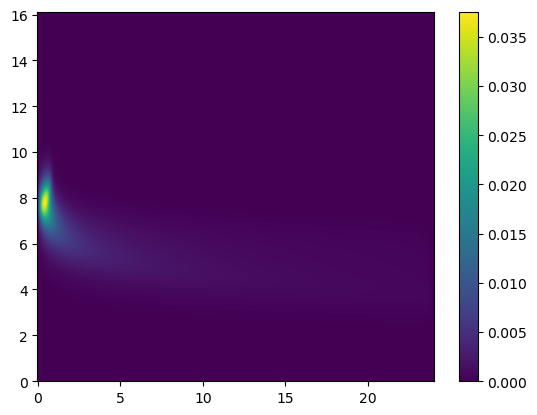

In [7]:
for filename in test_1_d:
    with FlowData(filename) as f:
        f.plot_Q()

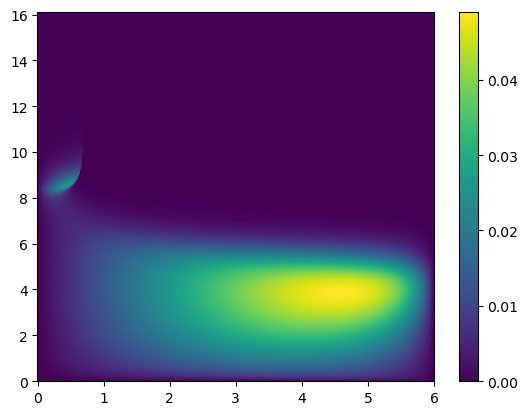

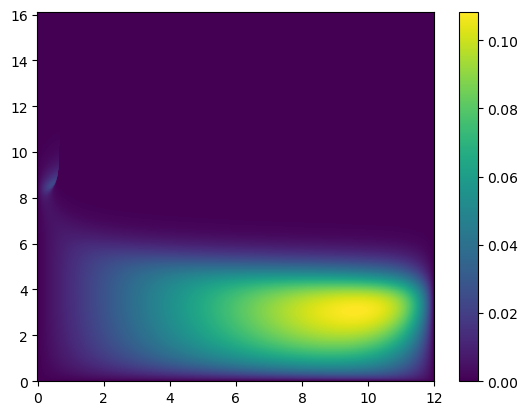

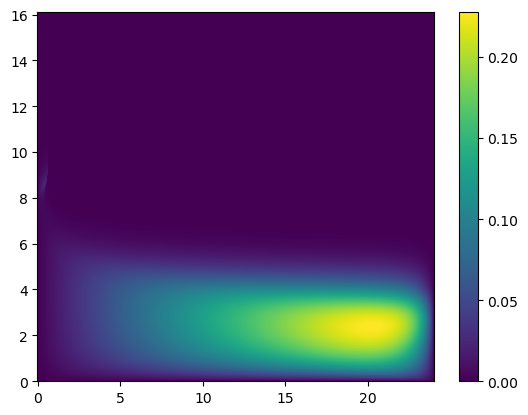

In [8]:
for filename in test_2_d:
    with FlowData(filename) as f:
        f.plot_Q()

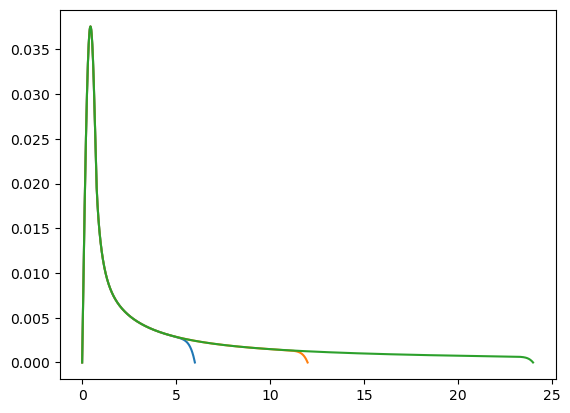

In [10]:
for filename in test_1_d:
    with FlowData(filename) as f:
        grid, max_Q = f.get_max_Q_of_x()
        plt.plot(grid, max_Q)

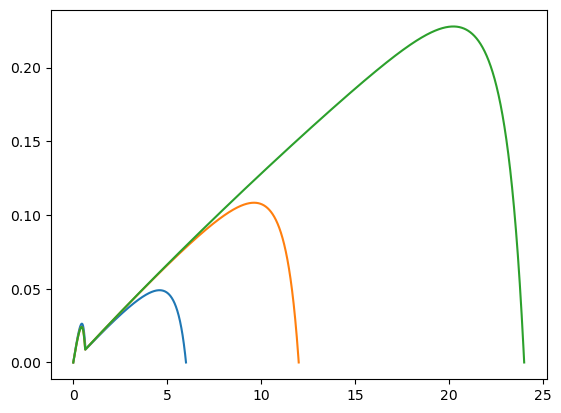

In [9]:
for filename in test_2_d:
    with FlowData(filename) as f:
        grid, max_Q = f.get_max_Q_of_x()
        plt.plot(grid, max_Q)

(0.0, 2.0)

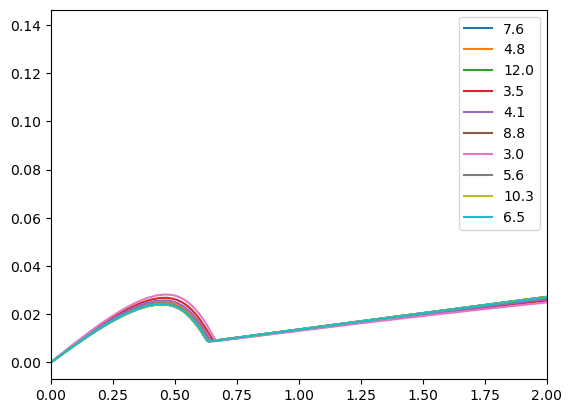

In [9]:
from os import listdir

all_test = listdir("sigma_max_test/d_2")
all_test = list(map(lambda x: "sigma_max_test/d_2/"+x, all_test))

for i, filename in enumerate(all_test):
    with FlowData(filename) as f:
        grid, max_Q = f.get_max_Q_of_x()
        plt.plot(grid, max_Q, label=f'{f.get_sigma_max():.1f}')
        
plt.legend()
plt.xlim([0, 2])

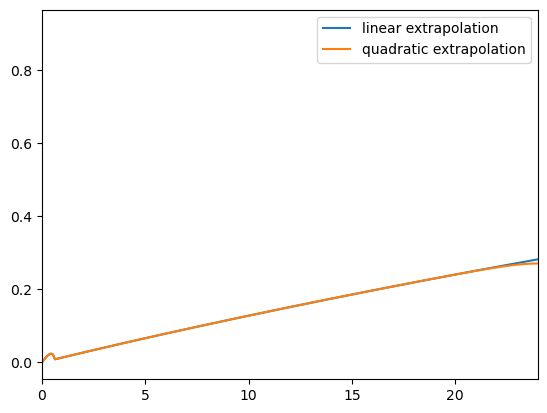

In [3]:
comparison = "sigma_max_test/mu=0.0_T=0.3_sigmaMax=135.46317367731302_Lambda=1000.0_kir=0.0001_nGrid=22577_nFlavor=2_tolerance=1.000000e-12_d=2.hdf5"
test = "mu=0.0_T=0.3_sigmaMax=24.0_Lambda=1000.0_kir=0.0001_nGrid=4000_nFlavor=2_tolerance=1.000000e-12_d=2.hdf5"
with FlowData(comparison) as f:
    grid, max_Q = f.get_max_Q_of_x()
    plt.plot(grid, max_Q, label="linear extrapolation")

with FlowData(test) as f:
    grid, max_Q = f.get_max_Q_of_x()
    plt.plot(grid, max_Q, label="quadratic extrapolation")

plt.xlim([0, 24])
plt.legend()